In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("E:\\download folder\\bank-full.csv", delimiter=';')
df.shape

(45211, 17)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.value_counts().sum()

45211

In [9]:
df[df.duplicated()].shape

(0, 17)

In [10]:
#No. of discrete variables

discrete_feature = [feature for feature in df.columns if len(df[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 10


In [11]:
continuous_feature = [feature for feature in df.columns if df[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count: {}'.format(len(continuous_feature)))

Continuous Feature Count: 7


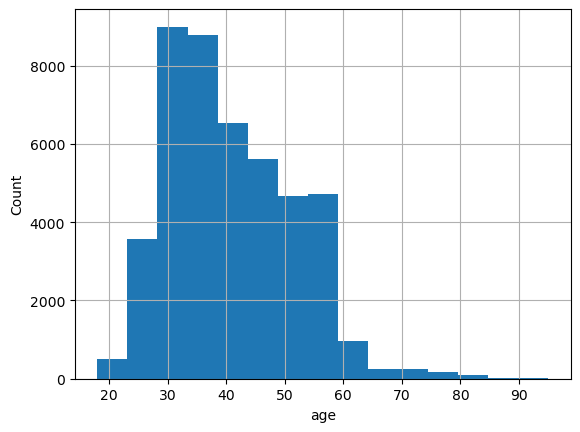

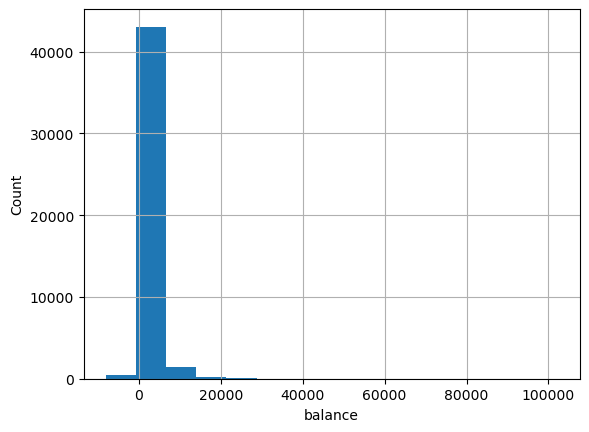

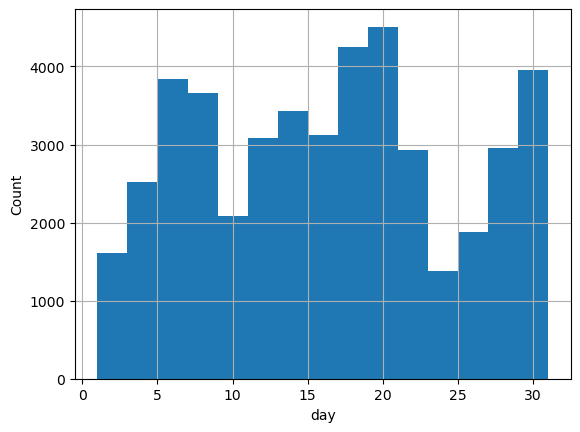

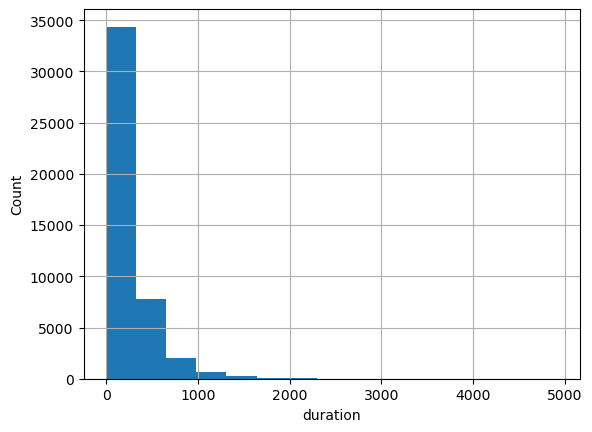

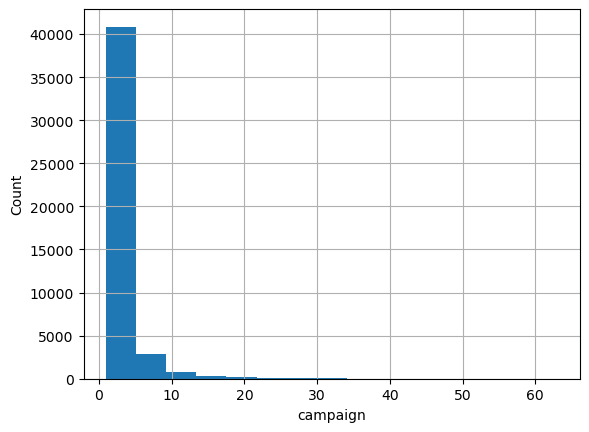

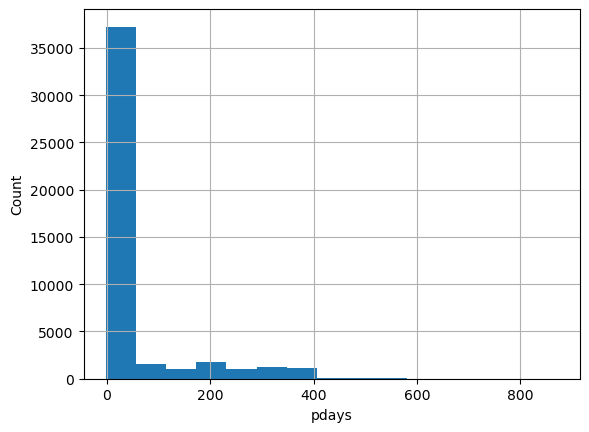

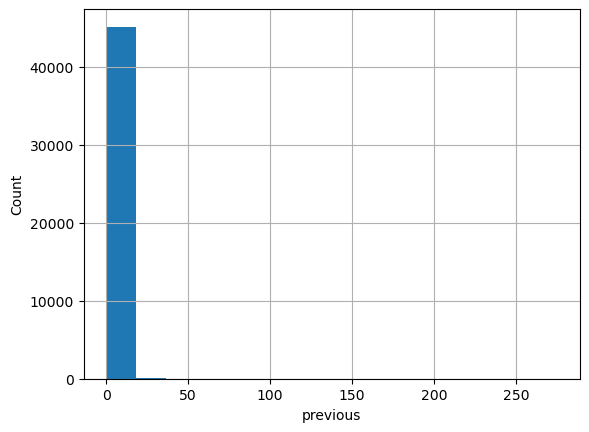

In [12]:
# Lets analyze the continuous data by creating histograms to understand the distribution of the numerical features.

for feature in continuous_feature:
    df1= df.copy()
    df1[feature].hist(bins=15)
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.show()

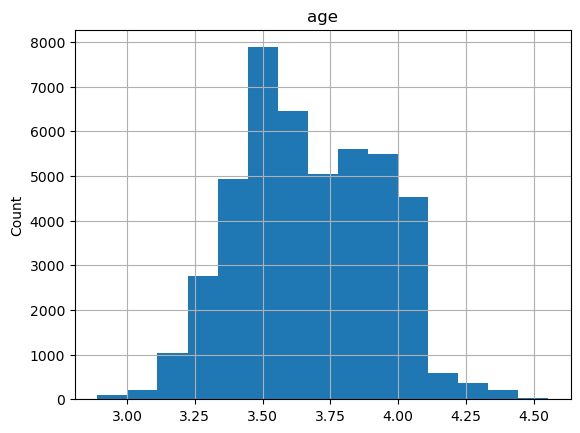

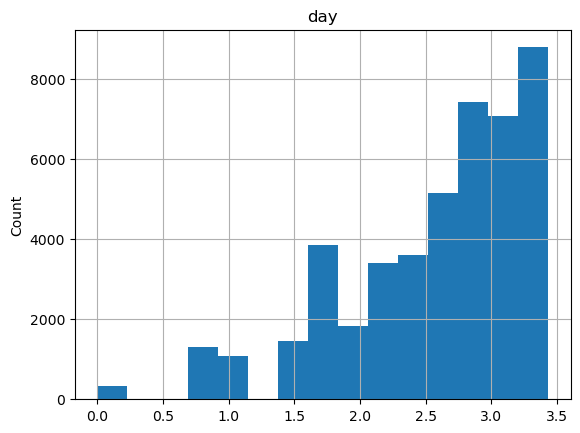

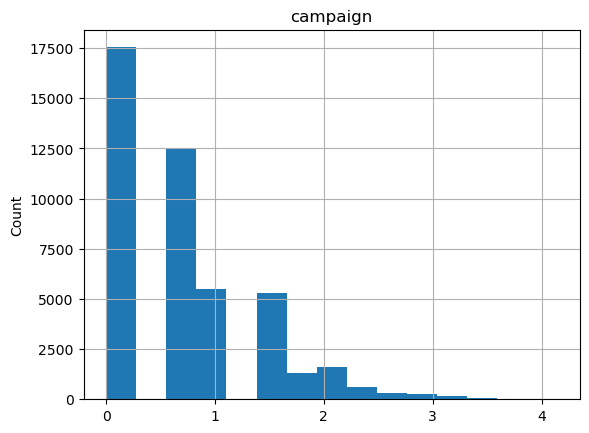

E:\softwares\Newfolder\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


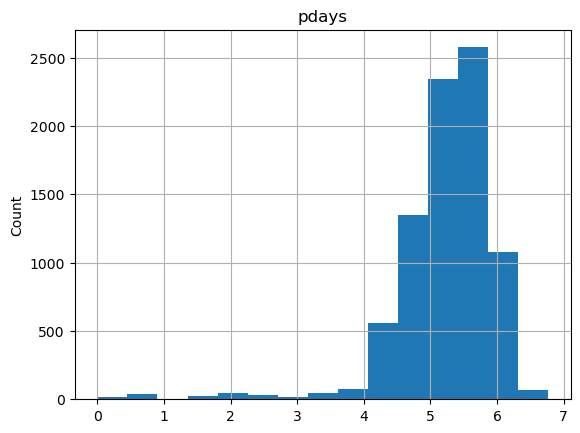

In [13]:
#Log transformation

for feature in continuous_feature:
    df2= df.copy()
    if 0 in df2[feature].unique():
        pass
    else:
        df2[feature]= np.log(df2[feature])
        df2[feature].hist(bins=15)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

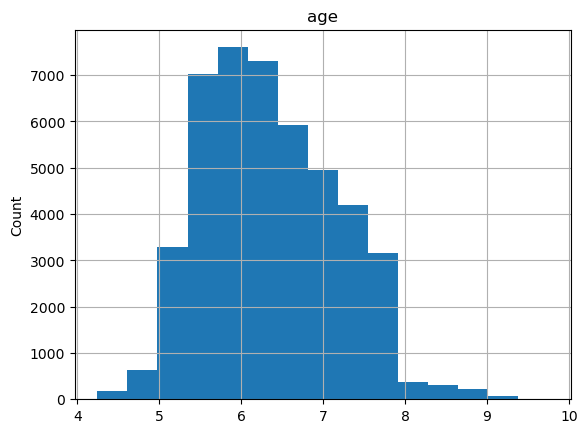

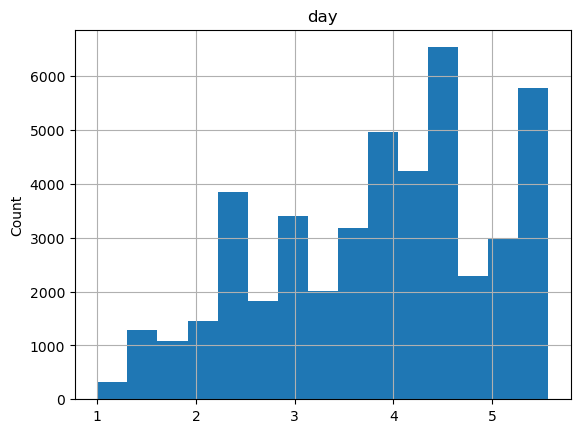

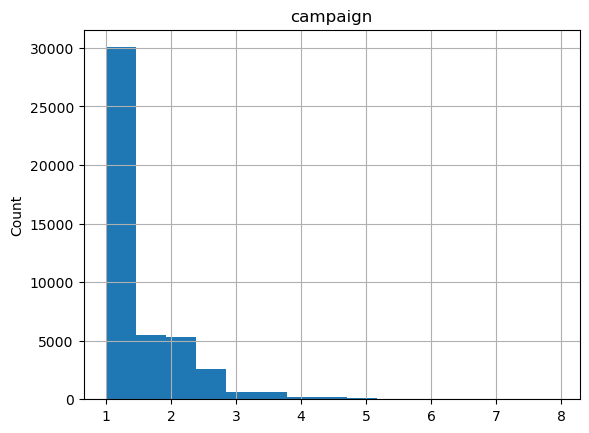

E:\softwares\Newfolder\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


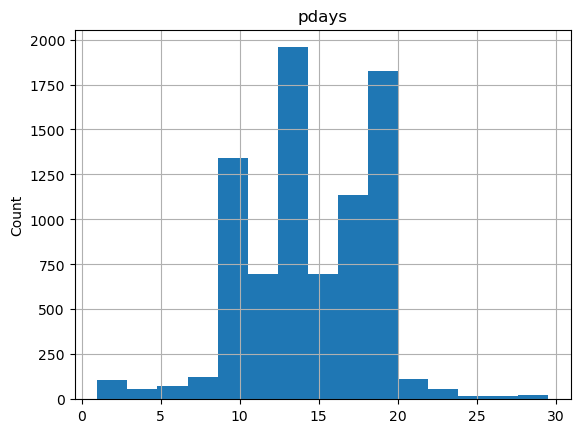

In [14]:
#Square root transformation

for feature in continuous_feature:
    df2= df.copy()
    if 0 in df2[feature].unique():
        pass
    else:
        df2[feature]= np.sqrt(df2[feature])
        df2[feature].hist(bins=15)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

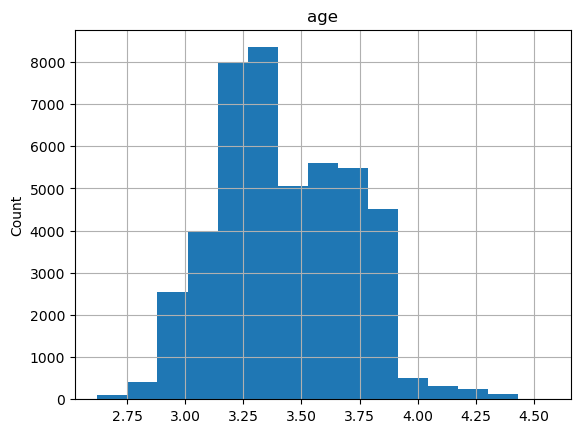

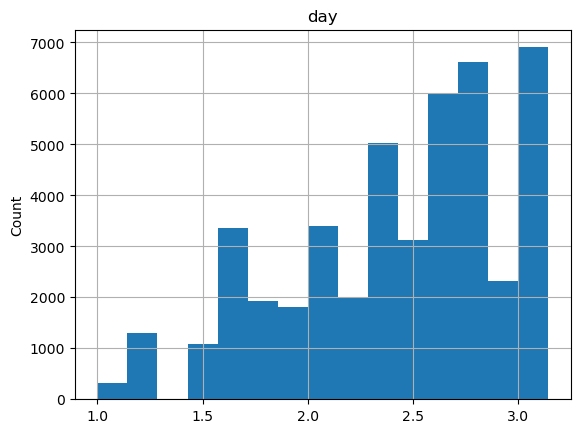

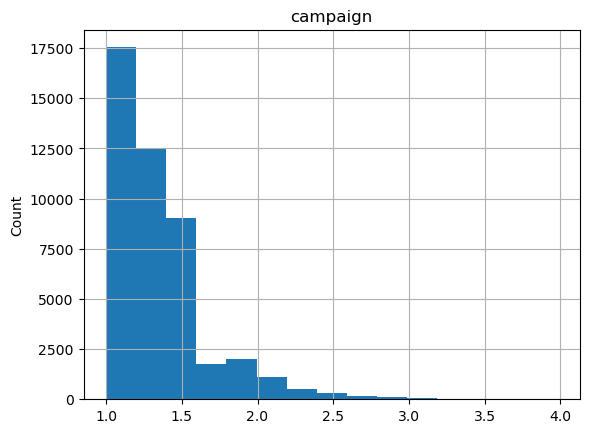

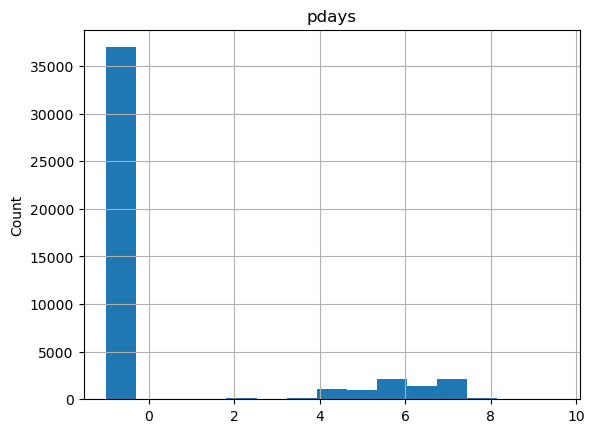

In [15]:
#Cube root transformation

for feature in continuous_feature:
    df2= df.copy()
    if 0 in df2[feature].unique():
        pass
    else:
        df2[feature]= np.cbrt(df2[feature])
        df2[feature].hist(bins=15)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

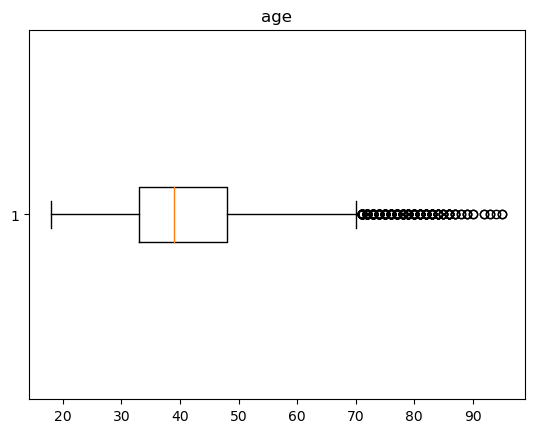

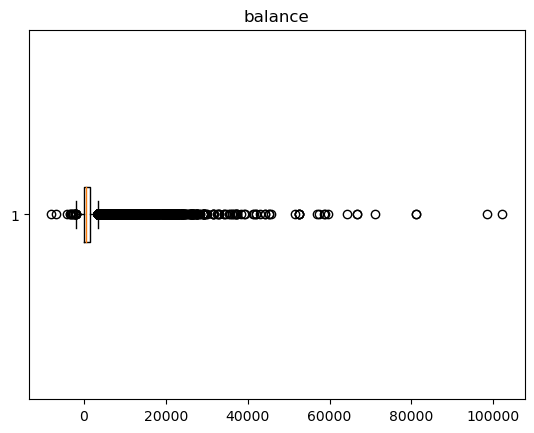

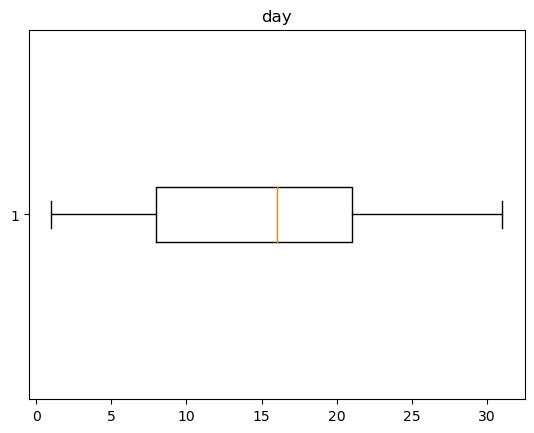

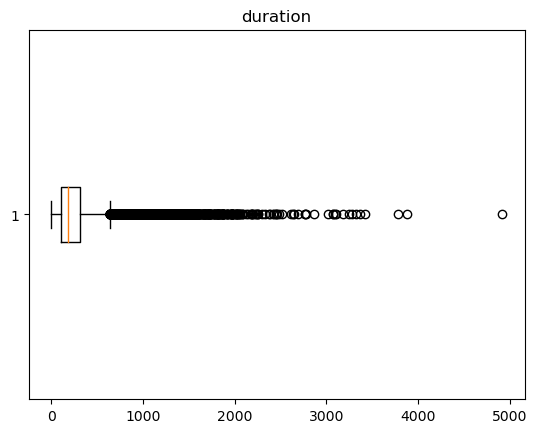

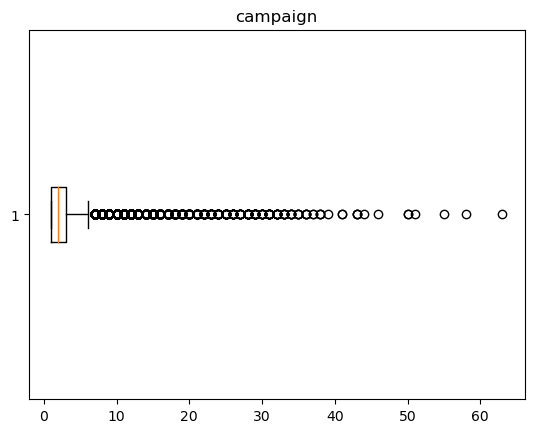

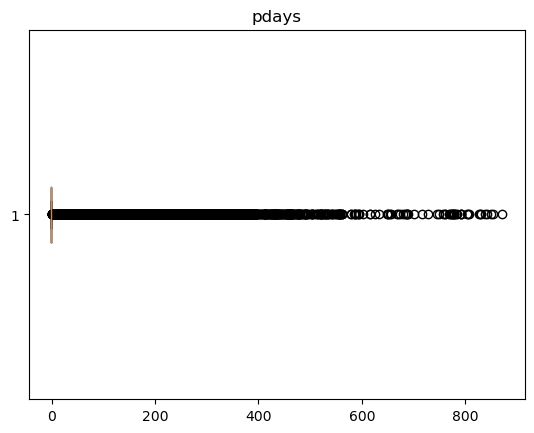

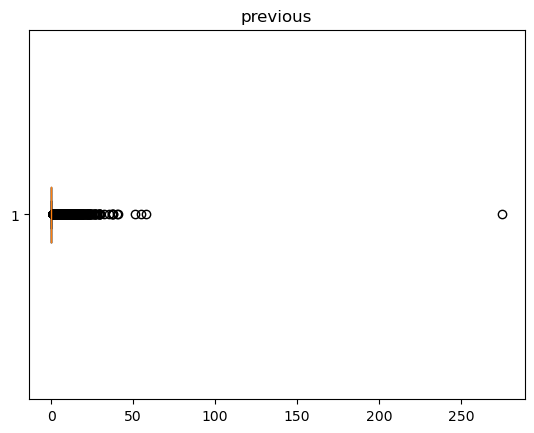

In [16]:
#Checking for outliers

for feature in continuous_feature:
    outliers = df.copy()
    plt.boxplot(outliers[feature], vert= False)
    plt.title(feature)
    plt.show()

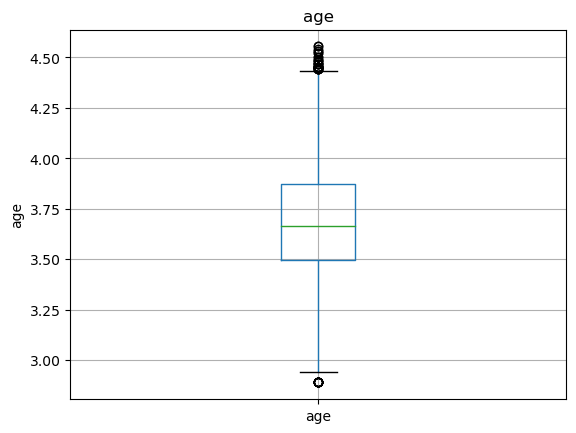

E:\softwares\Newfolder\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\softwares\Newfolder\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


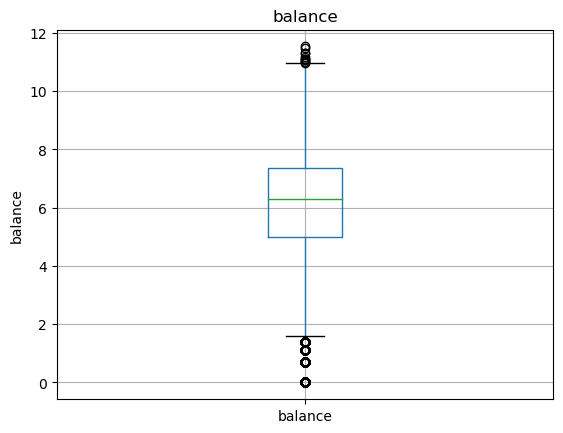

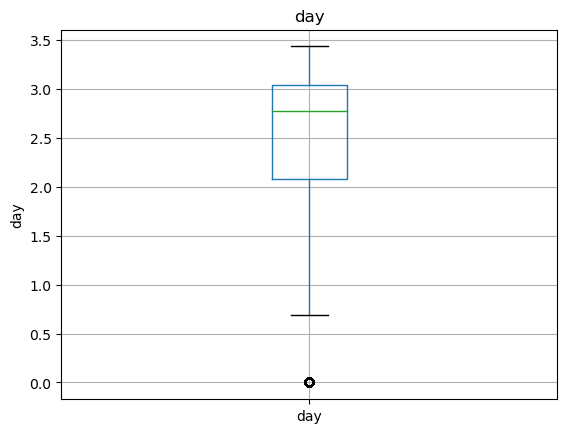

E:\softwares\Newfolder\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


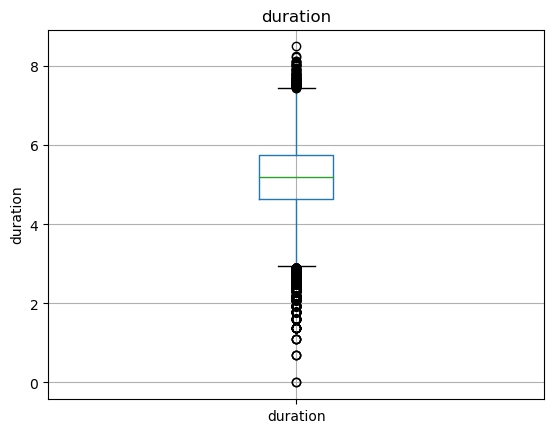

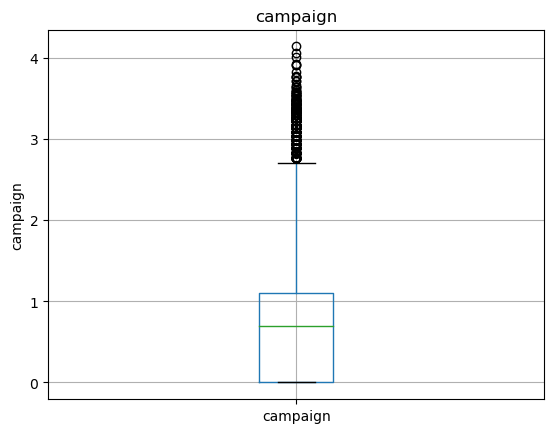

E:\softwares\Newfolder\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


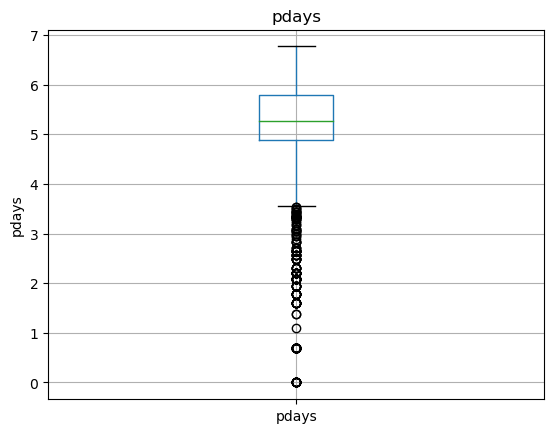

E:\softwares\Newfolder\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\softwares\Newfolder\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
E:\softwares\Newfolder\Lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
E:\softwares\Newfolder\Lib\site-packages\matplotlib\cbook\__init__.py:1269: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
E:\softwares\Newfolder\Lib\site-packages\matplotlib\cbook\__init__.py:1277: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
E:\softwares\Newfolder\Lib\site-packages\matplotlib\cbook\__init__.py:1278: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


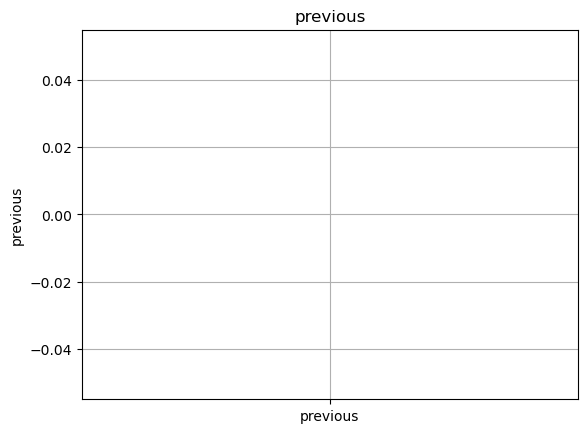

In [17]:
#Outliers after Log transformation

for feature in continuous_feature:
    df3 = df.copy()
    df3[feature] = np.log(df3[feature])
    df3.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

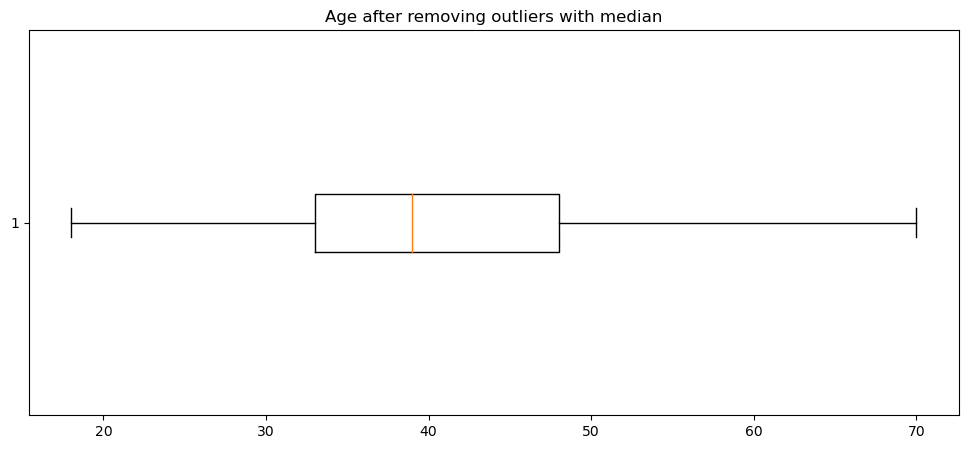

In [18]:
#Handling outlier with median imputation

df4= df.copy()

for i in df4["age"]:
    q1= np.quantile(df4["age"], 0.25)
    q3= np.quantile(df4["age"], 0.75)
    med= np.median(df4["age"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df4["age"]= df4["age"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df4["age"], vert=False)
plt.title("Age after removing outliers with median")
plt.show()

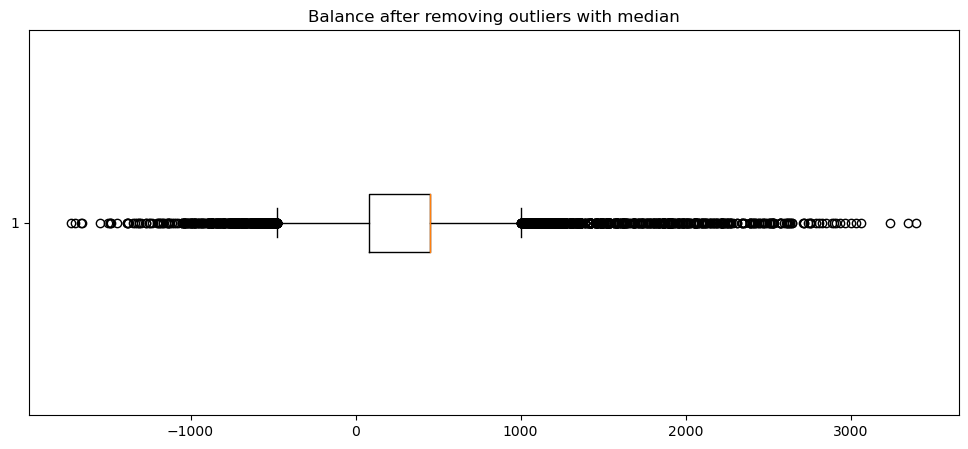

In [19]:
for i in df4["balance"]:
    q1= np.quantile(df4["balance"], 0.25)
    q3= np.quantile(df4["balance"], 0.75)
    med= np.median(df4["balance"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df4["balance"]= df4["balance"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df4["balance"], vert=False)
plt.title("Balance after removing outliers with median")
plt.show()

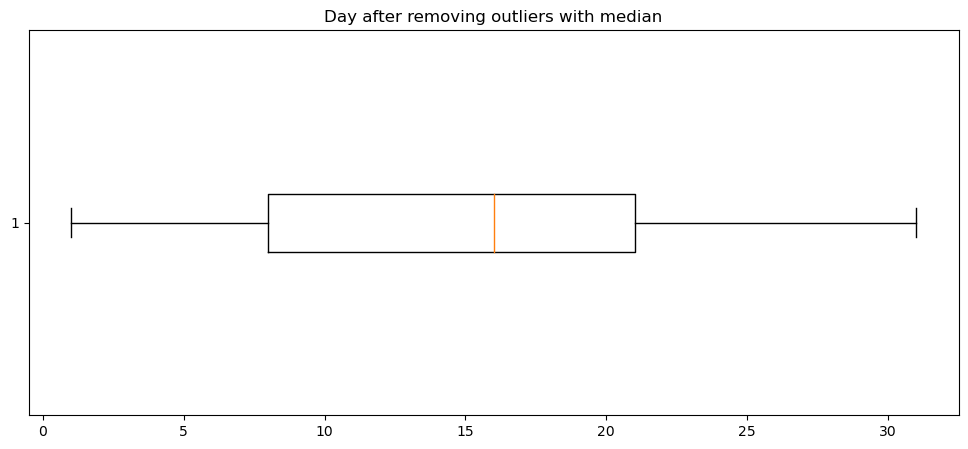

In [20]:
for i in df4["day"]:
    q1= np.quantile(df4["day"], 0.25)
    q3= np.quantile(df4["day"], 0.75)
    med= np.median(df4["day"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df4["day"]= df4["day"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df4["day"], vert=False)
plt.title("Day after removing outliers with median")
plt.show()

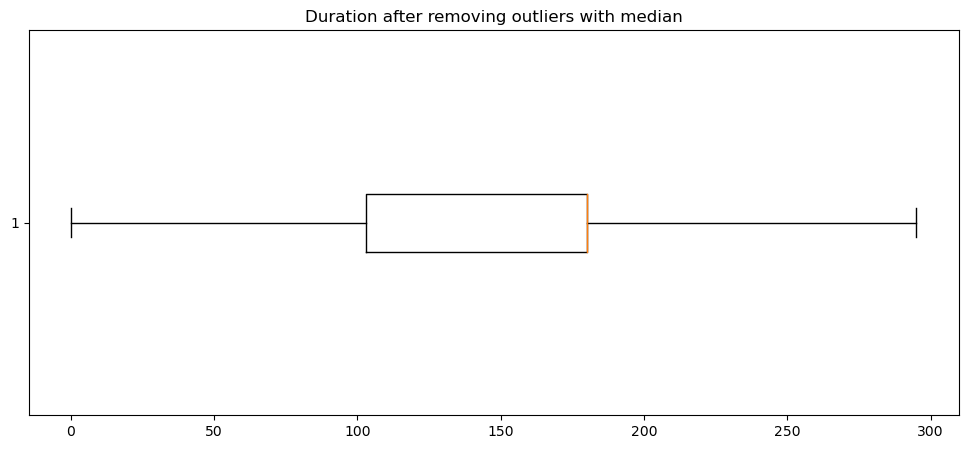

In [21]:
for i in df4["duration"]:
    q1= np.quantile(df4["duration"], 0.25)
    q3= np.quantile(df4["duration"], 0.75)
    med= np.median(df4["duration"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df4["duration"]= df4["duration"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df4["duration"], vert=False)
plt.title("Duration after removing outliers with median")
plt.show()

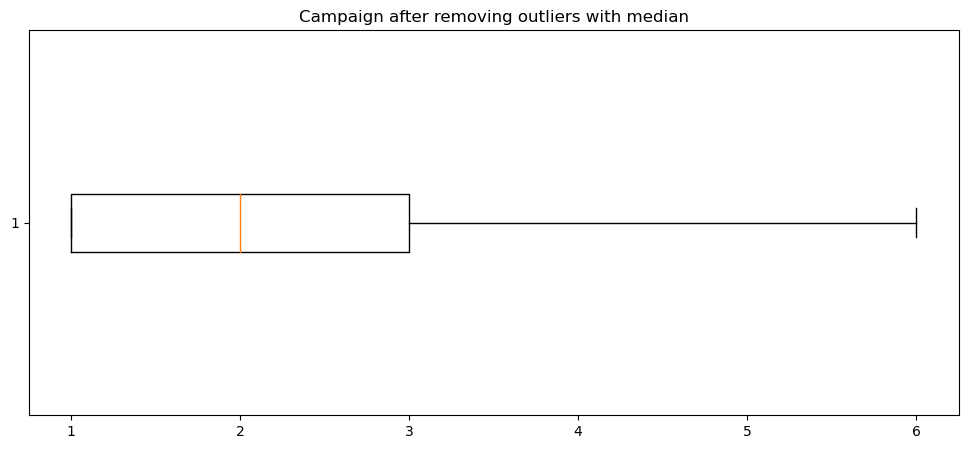

In [22]:
for i in df4["campaign"]:
    q1= np.quantile(df4["campaign"], 0.25)
    q3= np.quantile(df4["campaign"], 0.75)
    med= np.median(df4["campaign"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df4["campaign"]= df4["campaign"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df4["campaign"], vert=False)
plt.title("Campaign after removing outliers with median")
plt.show()

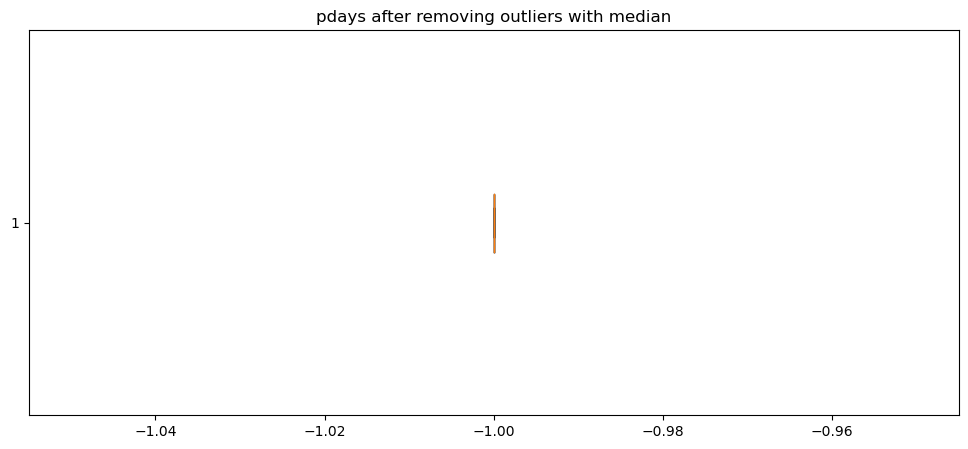

In [23]:
for i in df4["pdays"]:
    q1= np.quantile(df4["pdays"], 0.25)
    q3= np.quantile(df4["pdays"], 0.75)
    med= np.median(df4["pdays"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df4["pdays"]= df4["pdays"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df4["pdays"], vert=False)
plt.title("pdays after removing outliers with median")
plt.show()

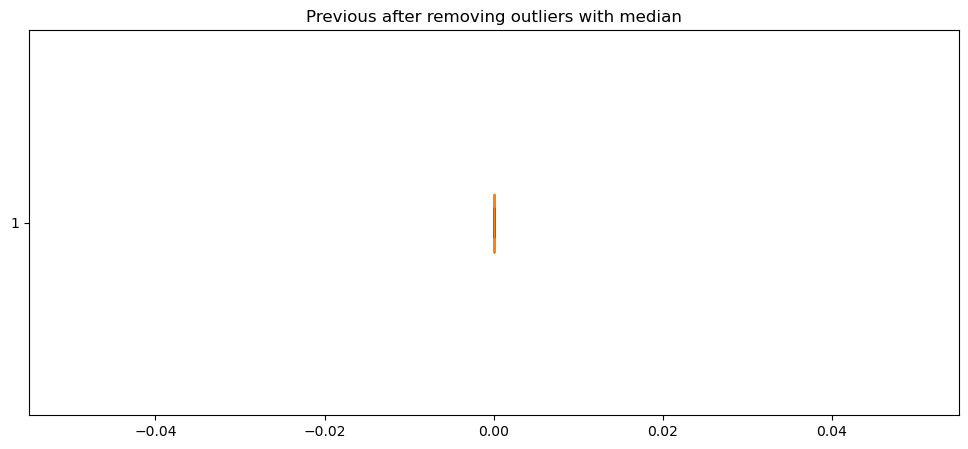

In [24]:
for i in df4["previous"]:
    q1= np.quantile(df4["previous"], 0.25)
    q3= np.quantile(df4["previous"], 0.75)
    med= np.median(df4["previous"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df4["previous"]= df4["previous"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df4["previous"], vert=False)
plt.title("Previous after removing outliers with median")
plt.show()

In [25]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,448,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,448,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()


In [29]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
df4[categorical_cols] = df4[categorical_cols].apply(LE.fit_transform)

In [31]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,448,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,448,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [34]:
y= df4["y"]

x=df4.iloc[:,0:16]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,448,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,448,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_train= logreg.predict(x_train)
y_pred_test= logreg.predict(x_test)

E:\softwares\Newfolder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#Cross Validation

training_accuracy=[] 
test_accuracy=[]

for i in range(1,101):
    x_train, x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=i)
    logreg.fit(x_train, y_train)
    y_pred_train= logreg.predict(x_train)
    y_pred_test= logreg.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
print("Cross validation training score:", np.mean(training_accuracy).round(2))
print("Cross validation test score:", np.mean(test_accuracy).round(2))

E:\softwares\Newfolder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\softwares\Newfolder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Cross validation training score: 0.88
Cross validation test score: 0.88


E:\softwares\Newfolder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
#Let's try to reduce variables

from sklearn.linear_model import Lasso
Lass=Lasso(alpha=0.04)
Lass.fit(x,y)

Lass.coef_
pd.concat([pd.DataFrame(list(x)), pd.DataFrame(Lass.coef_)], axis=1)

,0,0
0,age,-0.000000
1,job,0.000148
2,marital,0.000000
3,education,0.000000
4,default,-0.000000
5,balance,0.000046
6,housing,-0.000000
7,loan,-0.000000
8,contact,-0.001340
9,day,-0.000016


In [69]:
y= df4["y"]

In [77]:
#x_new=x.drop(x.columns[[2,4,13,14]], axis=1) #---->alpha=0.005
#x_new=x.drop(x.columns[[0,1,2,3,4,6,7,8,9,10,12,13,14,15]], axis=1) #---->alpha=0.05
x_new=x.drop(x.columns[[0,2,3,4,6,7,10,12,13,14,15]], axis=1) #---->alpha=0.04


In [79]:
#Cross Validation(With 5 variables )

training_accuracy=[] 
test_accuracy=[]

for i in range(1,101):
    x_train, x_test,y_train,y_test= train_test_split(x_new,y, test_size= 0.30, random_state=i)
    logreg.fit(x_train, y_train)
    y_pred_train= logreg.predict(x_train)
    y_pred_test= logreg.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
print("Cross validation training score:", np.mean(training_accuracy).round(2))
print("Cross validation test score:", np.mean(test_accuracy).round(2))

Cross validation training score: 0.88
Cross validation test score: 0.88
